In [5]:
test = """
  1  2
  3  4
  5  6
"""

In [6]:
import numpy as np
import itertools

In [7]:
smaller = np.array([[int(x) for x in line.strip().split()] for line in test.split('\n') if line != ''])

In [8]:
v = 7
l = len(smaller)

In [9]:
rows = []
for i in range(1, v+1):
    rows.append ( np.hstack( (smaller + (smaller >= i), [[i]]*l) ) )
rows = np.concatenate(rows)
# rows = np.sort(rows, axis=1)
# rows = np.unique(rows, axis=0)
rows

array([[2, 3, 1],
       [4, 5, 1],
       [6, 7, 1],
       [1, 3, 2],
       [4, 5, 2],
       [6, 7, 2],
       [1, 2, 3],
       [4, 5, 3],
       [6, 7, 3],
       [1, 2, 4],
       [3, 5, 4],
       [6, 7, 4],
       [1, 2, 5],
       [3, 4, 5],
       [6, 7, 5],
       [1, 2, 6],
       [3, 4, 6],
       [5, 7, 6],
       [1, 2, 7],
       [3, 4, 7],
       [5, 6, 7]])

In [10]:
k = 2
sets = [set(i) for i in list(itertools.combinations(range(1, v+1), k))]
for p in sets:
    print(p, sum([len(p.intersection(r)) == k for r in rows]) )

{1, 2} 7
{1, 3} 3
{1, 4} 2
{1, 5} 2
{1, 6} 2
{1, 7} 2
{2, 3} 3
{2, 4} 2
{2, 5} 2
{2, 6} 2
{2, 7} 2
{3, 4} 5
{3, 5} 3
{3, 6} 2
{3, 7} 2
{4, 5} 5
{4, 6} 2
{4, 7} 2
{5, 6} 3
{5, 7} 3
{6, 7} 7


This is too many. Gotta try a different strategy. Maybe more symmetric?

In [11]:
extended = np.hstack( (smaller, [[v]]*l)  )

In [12]:
rows = []
for  i in range(v):
    rows.append(  (extended + i) % v)
rows = np.concatenate(rows)
rows = np.sort(rows, axis=1)
# rows = np.unique(rows, axis=0)
rows

array([[0, 1, 2],
       [0, 3, 4],
       [0, 5, 6],
       [1, 2, 3],
       [1, 4, 5],
       [0, 1, 6],
       [2, 3, 4],
       [2, 5, 6],
       [0, 1, 2],
       [3, 4, 5],
       [0, 3, 6],
       [1, 2, 3],
       [4, 5, 6],
       [0, 1, 4],
       [2, 3, 4],
       [0, 5, 6],
       [1, 2, 5],
       [3, 4, 5],
       [0, 1, 6],
       [2, 3, 6],
       [4, 5, 6]])

In [13]:
%%time
k = 2
sets = [set(i) for i in list(itertools.combinations(range(v), k))]
for p in sets:
    print(p, sum([len(p.intersection(r)) == k for r in rows]) )

{0, 1} 5
{0, 2} 2
{0, 3} 2
{0, 4} 2
{0, 5} 2
{0, 6} 5
{1, 2} 5
{1, 3} 2
{1, 4} 2
{1, 5} 2
{1, 6} 2
{2, 3} 5
{2, 4} 2
{2, 5} 2
{2, 6} 2
{3, 4} 5
{3, 5} 2
{3, 6} 2
{4, 5} 5
{4, 6} 2
{5, 6} 5
CPU times: user 10.3 ms, sys: 268 µs, total: 10.6 ms
Wall time: 7.53 ms


In [14]:
%%time
k = 2
sets = [set(i) for i in list(itertools.combinations(range(v), k))]
for p in sets:
    print(p, sum([p.issubset(r) for r in rows]) )

{0, 1} 5
{0, 2} 2
{0, 3} 2
{0, 4} 2
{0, 5} 2
{0, 6} 5
{1, 2} 5
{1, 3} 2
{1, 4} 2
{1, 5} 2
{1, 6} 2
{2, 3} 5
{2, 4} 2
{2, 5} 2
{2, 6} 2
{3, 4} 5
{3, 5} 2
{3, 6} 2
{4, 5} 5
{4, 6} 2
{5, 6} 5
CPU times: user 15.5 ms, sys: 554 µs, total: 16.1 ms
Wall time: 11.4 ms


Ok, so this overshoots, but it does find a cover.

# trying 5,6,48

In [15]:
# https://ljcr.dmgordon.org/cover/LARGE/C_48_6_5.html
with open('s-5-6-48.txt') as f:
    s_5_6_48 = f.read()
f.close()
s_5_6_48 = s_5_6_48.split('\n')
assert len(s_5_6_48) == 285384

In [16]:
bigger = np.array([[int(x) for x in line.strip().split()] for line in s_5_6_48 if line != ''])

In [17]:
len(bigger)

285384

In [18]:
v = 49
l = len(bigger)

In [19]:
extended = np.hstack( (bigger, [[v]]*l)  )

In [20]:
rows = []
for  i in range(v):
    rows.append(  (extended + i) % v)
rows = np.concatenate(rows)
rows = np.sort(rows, axis=1)
rows = np.unique(rows, axis=0)

In [21]:
l*7

1997688

In [22]:
len(rows)

11894701

In [23]:
rows

array([[ 0,  1,  2, ...,  4,  5, 21],
       [ 0,  1,  2, ...,  4,  5, 27],
       [ 0,  1,  2, ...,  4,  6, 22],
       ...,
       [40, 41, 42, ..., 45, 46, 48],
       [40, 42, 43, ..., 45, 46, 48],
       [40, 42, 43, ..., 46, 47, 48]])

In [25]:
# k = 2
# sets = [set(i) for i in list(itertools.combinations(range(v), k))]
# for p in sets:
#     print(p, sum([len(p.intersection(r)) == k for r in rows]) )

## trying something different

what about just simplifying the covering?

In [764]:
# https://ljcr.dmgordon.org/show_cover.php?v=21&k=7&t=6
v = 22
with open('c-22-5-4.txt') as f:
    data = f.read()
f.close()
data = data.split('\n')
# assert len(data) == 9218

In [765]:
cover = np.array([[int(x) for x in line.strip().split()] for line in data if line != ''])

In [766]:
from collections import Counter

In [767]:
%%time
c = Counter()
d = {}
k = 4
sets = [set(i) for i in list(itertools.combinations(range(1, v+1), k))]
print(len(sets))
for idx, p in enumerate(sets):
    if idx % 200 == 0:
        print(idx)
    ct = sum([p.issubset(r) for r in cover])
    c[ct] += 1
    if ct not in d:
        d[ct] = []
    d[ct].append(p)
#     print(p,  ct)

7315
0
200
400
600
800
1000
1200
1400
1600
1800
2000
2200
2400
2600
2800
3000
3200
3400
3600
3800
4000
4200
4400
4600
4800
5000
5200
5400
5600
5800
6000
6200
6400
6600
6800
7000
7200
CPU times: user 14.5 s, sys: 3.98 ms, total: 14.5 s
Wall time: 14.5 s


In [768]:
import matplotlib.pyplot as plt

<BarContainer object of 4 artists>

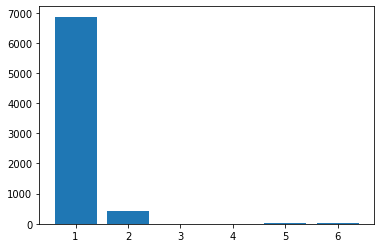

In [769]:
plt.bar(c.keys(), c.values())

In [770]:
# %%time
# c = Counter()
# d = {}
# t = 4
# sets = [set(i) for i in list(itertools.combinations(range(1, v+1), t))]
# print(len(sets))
# for idx, p in enumerate(sets):
#     if idx % 1000 == 0:
#         print(idx)
#     ct = sum([p.issubset(r) for r in cover])
#     c[ct] += 1
#     if ct not in d:
#         d[ct] = []
#     d[ct].append(p)
# #     print(p,  ct)

<BarContainer object of 4 artists>

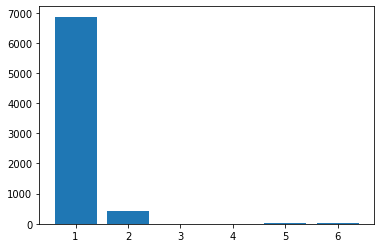

In [771]:
plt.bar(c.keys(), c.values())

In [772]:
e = d.copy()

In [773]:
del e[1]

<BarContainer object of 3 artists>

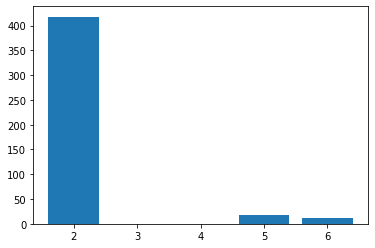

In [774]:
plt.bar(e.keys(), [len(x) for x in e.values()])

In [775]:
e.keys()

dict_keys([6, 5, 2])

In [776]:
d[6]

[{1, 2, 3, 10},
 {1, 4, 8, 10},
 {1, 5, 9, 10},
 {1, 6, 7, 10},
 {2, 4, 9, 10},
 {2, 5, 7, 10},
 {2, 6, 8, 10},
 {3, 4, 7, 10},
 {3, 5, 8, 10},
 {3, 6, 9, 10},
 {4, 5, 6, 10},
 {7, 8, 9, 10}]

In [779]:
[s for s in cover if set(d[5][0]).issubset(s)]

[array([ 1,  2,  4,  5, 11]),
 array([ 1,  2,  4,  5, 12]),
 array([ 1,  2,  4,  5, 14]),
 array([ 1,  2,  4,  5, 15]),
 array([ 1,  2,  4,  5, 20])]

Method 2:

In [780]:
lst = []
for x in e:
    lst += e[x]

In [781]:
%%time
c2 = Counter()
d2 = {}
t = 3
sets = [set(i) for i in list(itertools.combinations(range(1, v+1), t))]
print(len(sets))
for idx, p in enumerate(sets):
    if idx % 1000 == 0:
        print(idx)
    ct = sum([p.issubset(r) for r in lst])
    c2[ct] += 1
    if ct not in d2:
        d2[ct] = []
    d2[ct].append(p)
#     print(p,  ct)

1540
0
1000
CPU times: user 92 ms, sys: 4.02 ms, total: 96 ms
Wall time: 94.4 ms


<BarContainer object of 3 artists>

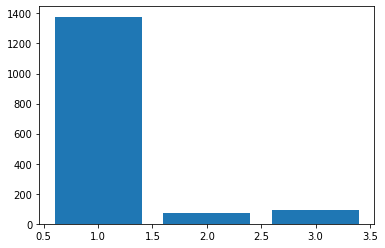

In [782]:
plt.bar(c2.keys(),c2.values())

In [783]:
c2

Counter({1: 1378, 2: 72, 3: 90})

In [784]:
sorted(c2.keys())[-5:]

[1, 2, 3]

trying for all of them...

In [785]:
outs = []
print(len(cover))
for idx, testval in enumerate(cover):
    if idx % 100 == 0:
        print(idx)
    testval = list(testval)
    vals = []
    for i in range(len(testval)):
        matches = [set(s) for s in cover if (set(testval[:i] + testval[i+1:]).issubset(s))]
        vals.append(len(matches))
    outs.append(vals)

1573
0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500


(array([  2.,   0.,  28.,   0.,   0.,  60.,   0., 786.,   0., 697.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <a list of 10 Patch objects>)

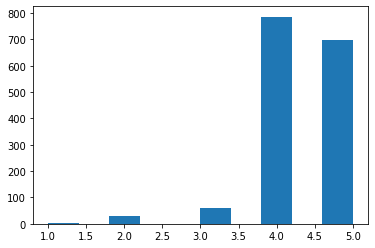

In [787]:
plt.hist([o.count(1) for o in outs])

In [788]:
# where there are only 2 or 3 "1s"

In [789]:
cover[ np.array(list(range(len(outs))))[np.array([o.count(1) for o in outs]) == 1] ]

array([[14, 18, 20, 21, 22],
       [14, 19, 20, 21, 22]])

In [813]:
# loose groupings
todo = cover[ np.array(list(range(len(outs))))[np.array([o.count(1) for o in outs]) <= 3]]
for testval in todo:
    if set({19, 20, 22}).issubset(testval):
        print('[' + ','.join([str(i) for i in testval]) + '],')
        testval = list(testval)
        for i in range(len(testval)):
            concat = testval[:i] + testval[i+1:]
            matches = [set(s) for s in cover if (set(concat).issubset(s))]
            if len(matches) == 1:
                print(concat)

[11,15,19,20,22],
[15, 19, 20, 22]
[11, 19, 20, 22]
[11, 15, 19, 22]
[12,14,19,20,22],
[12, 19, 20, 22]
[12, 14, 20, 22]
[12, 14, 19, 22]
[14,19,20,21,22],
[19, 20, 21, 22]


In [792]:
to_remove = [
[14,18,20,21,22],
    [14,19,20,21,22],
]

In [793]:
# loose groupings
for testval in to_remove:
    print('trying:', testval)
    testval = list(testval)
    for i in range(len(testval)):
        matches = [set(s) for s in cover if (set(testval[:i] + testval[i+1:]).issubset(s))]
        if len(matches) == 1:
            print(testval[:i] + testval[i+1:])

trying: [14, 18, 20, 21, 22]
[18, 20, 21, 22]
trying: [14, 19, 20, 21, 22]
[19, 20, 21, 22]


ah, but removing many of them might remove double / triple covers...

In [794]:
newcover = cover.copy()
len(newcover)

1573

In [795]:
for old in to_remove:
    assert 1 == sum(np.all(newcover == old, axis=1))
    idx = np.array(list(range(len(newcover))))[np.all(newcover == old, axis=1)][0]
    print(idx)
    newcover = np.delete(newcover, idx, 0)

1565
1565


In [796]:
# to_add = [
#     [1,3,6,8,10,4,13,15,16],
#     [3,6,8,10,11,4,13,15,16]
# ]
# newcover = np.concatenate((newcover, to_add))

In [797]:
len(newcover)

1571

In [801]:
%%time
c = Counter()
d = {}
t = 4
sets = [set(i) for i in list(itertools.combinations(range(1, v+1), t))]
print(len(sets))
for idx, p in enumerate(sets):
    if idx % 1000 == 0:
        print(idx)
    ct = sum([p.issubset(r) for r in newcover])
    c[ct] += 1
    if ct not in d:
        d[ct] = []
    d[ct].append(p)
#     print(p,  ct)

7315
0
1000
2000
3000
4000
5000
6000
7000
CPU times: user 14 s, sys: 12 ms, total: 14 s
Wall time: 14 s


<BarContainer object of 5 artists>

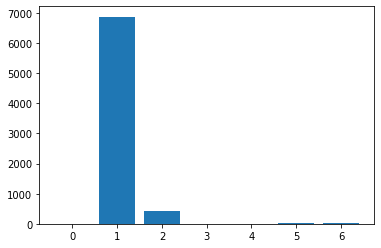

In [802]:
plt.bar(c.keys(), c.values())

In [803]:
c[0]

3

In [804]:
d[0]

[{14, 20, 21, 22}, {18, 20, 21, 22}, {19, 20, 21, 22}]

another strategy:

In [280]:
# related groupings
todo = [set(s) for s in cover if (set([2, 3, 4, 5, 14]).issubset(s))]
for testval in todo:
    print('trying:', testval)
    testval = list(testval)
    for i in range(len(testval)):
        matches = [set(s) for s in cover if (set(testval[:i] + testval[i+1:]).issubset(s))]
        if len(matches) == 1:
            print(testval[:i] + testval[i+1:])

trying: {1, 2, 3, 4, 5, 6, 14}
[1, 3, 4, 5, 6, 14]
[1, 2, 3, 5, 6, 14]
[1, 2, 3, 4, 6, 14]
trying: {1, 2, 3, 4, 5, 11, 14}
[1, 3, 4, 5, 11, 14]
[1, 2, 3, 5, 11, 14]
[1, 2, 3, 4, 11, 14]
trying: {2, 3, 4, 5, 6, 8, 14}
[2, 3, 4, 5, 8, 14]
[2, 3, 4, 5, 6, 8]
trying: {2, 3, 4, 5, 7, 11, 14}
[3, 4, 5, 7, 11, 14]
[2, 4, 5, 7, 11, 14]
[2, 3, 5, 7, 11, 14]
[2, 3, 4, 7, 11, 14]
[2, 3, 4, 5, 7, 14]
[2, 3, 4, 5, 7, 11]
trying: {2, 3, 4, 5, 9, 11, 14}
[3, 4, 5, 9, 11, 14]
[2, 4, 5, 9, 11, 14]
[2, 3, 5, 9, 11, 14]
[2, 3, 4, 9, 11, 14]
[2, 3, 4, 5, 9, 14]
[2, 3, 4, 5, 9, 11]
trying: {2, 3, 4, 5, 10, 11, 14}
[3, 4, 5, 10, 11, 14]
[2, 4, 5, 10, 11, 14]
[2, 3, 5, 10, 11, 14]
[2, 3, 4, 10, 11, 14]
[2, 3, 4, 5, 10, 14]
[2, 3, 4, 5, 10, 11]
trying: {2, 3, 4, 5, 11, 12, 14}
[3, 4, 5, 11, 12, 14]
[2, 4, 5, 11, 12, 14]
[2, 3, 5, 11, 12, 14]
[2, 3, 4, 11, 12, 14]
[2, 3, 4, 5, 12, 14]
[2, 3, 4, 5, 11, 12]
trying: {2, 3, 4, 5, 11, 13, 14}
[3, 4, 5, 11, 13, 14]
[2, 4, 5, 11, 13, 14]
[2, 3, 5, 11, 13, 14]
[2, 3, 

In [ ]:
1,2,6,11,17,20

In [139]:
sorted([list(s) for s in cover if set({9, 10, 15, 16, 18, 19}).issubset(s)])

[[3, 9, 10, 15, 16, 18, 19],
 [5, 9, 10, 15, 16, 18, 19],
 [6, 9, 10, 15, 16, 18, 19],
 [7, 9, 10, 15, 16, 18, 19],
 [9, 10, 13, 15, 16, 18, 19]]